ENV_FILE: /Users/nlourie/Desktop/Work/MIT/WINTER/GIT/winter-image-daemon/imagedaemon/.env
Science image: /Users/nlourie/data/image-daemon-data/raw/qcmos/science/8s_image_single.fits
Saving image to /Users/nlourie/tmp/test_image.png


/Users/nlourie/Desktop/Work/MIT/WINTER/GIT/winter-image-daemon/.conda/lib/python3.11/site-packages/slack_sdk/web/internal_utils.py:425: UserWarning: client.files_upload() may cause some issues like timeouts for relatively large files. Our latest recommendation is to use client.files_upload_v2(), which is mostly compatible and much stabler, instead.
  warnings.warn(message)


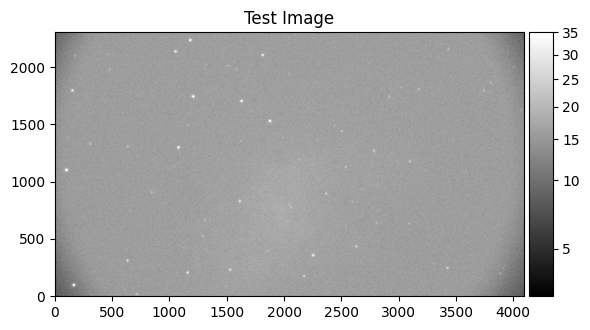

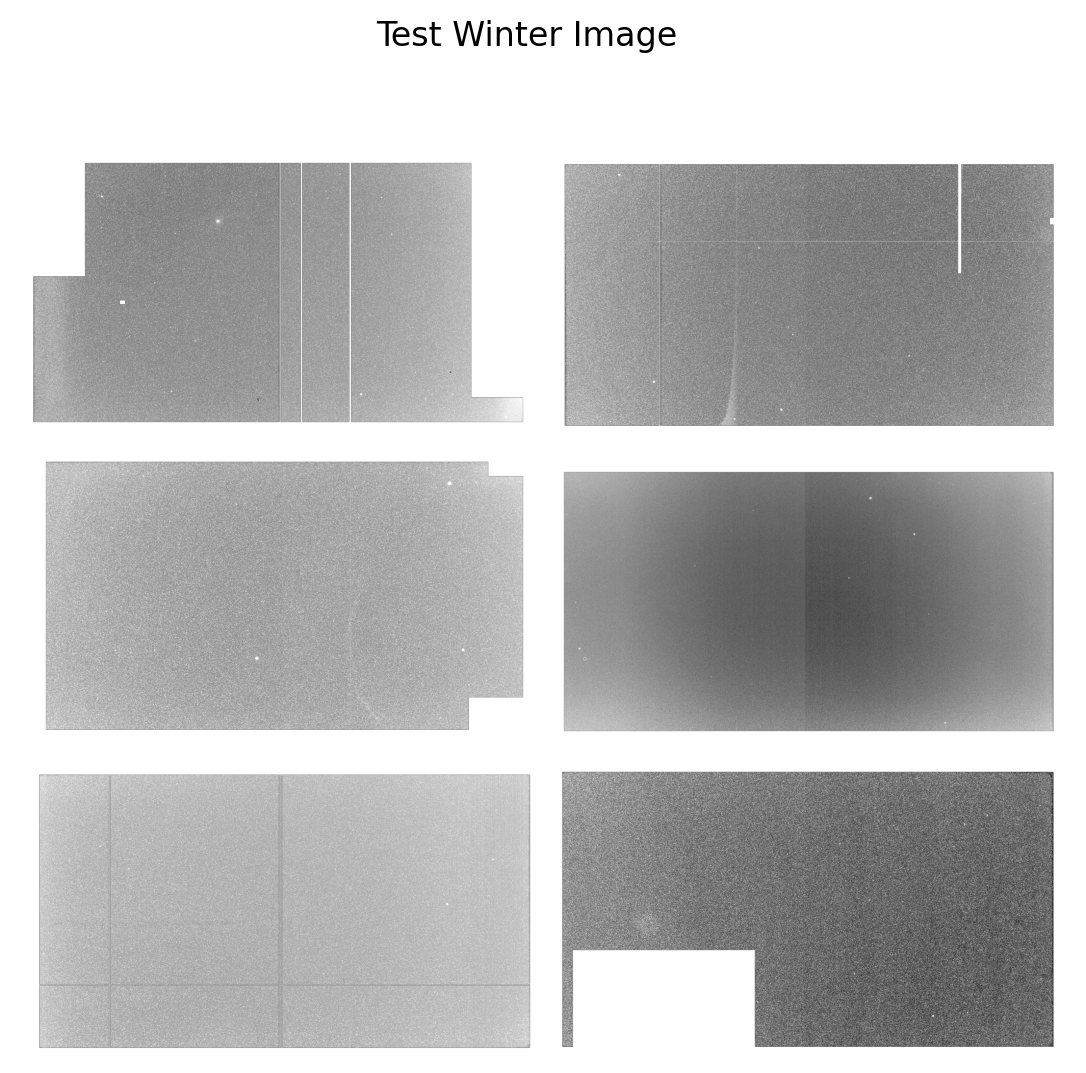

Dark image: /Users/nlourie/data/image-daemon-data/calibration/winter/masterdarks/winter_masterdark_120.000s.fits


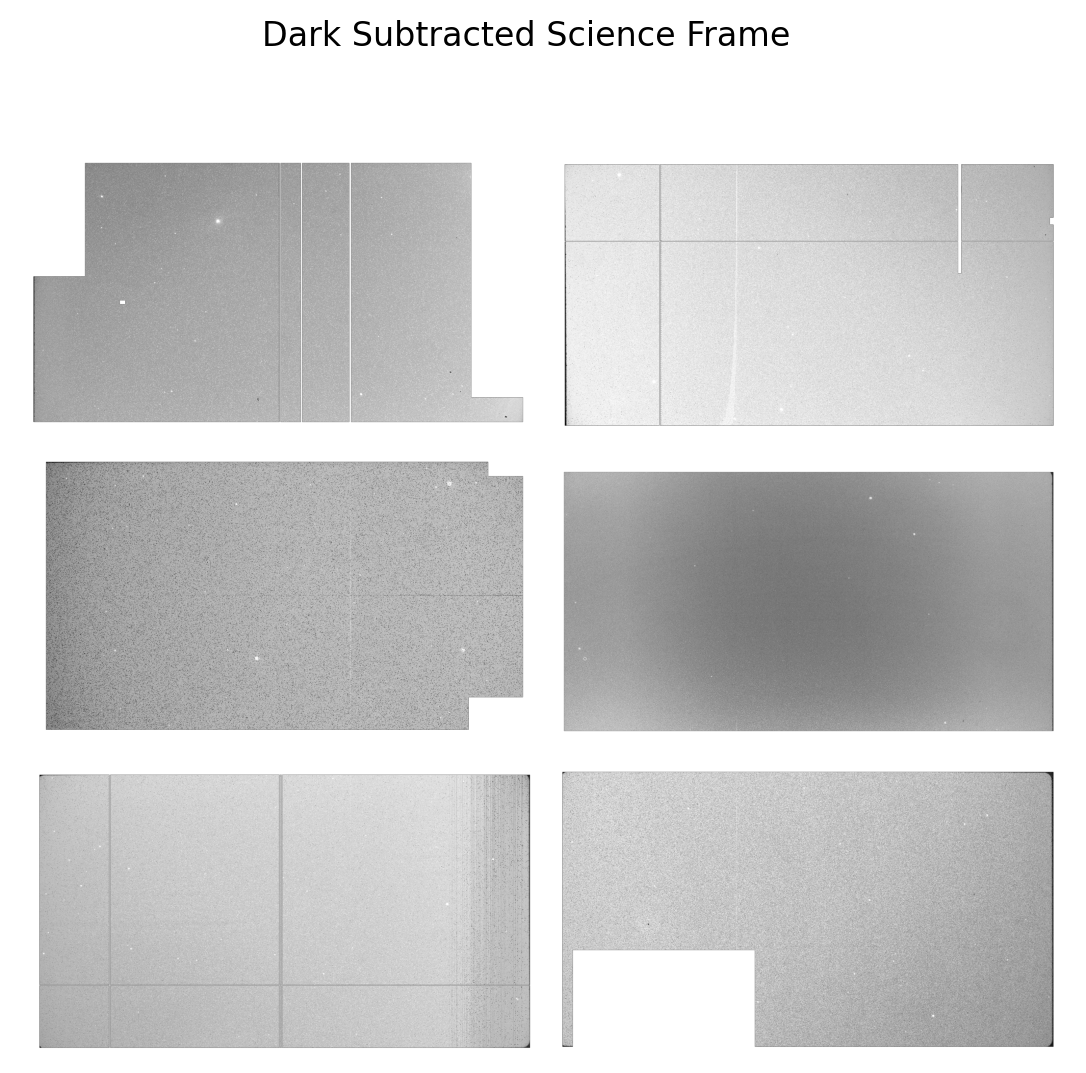

In [ ]:
from imagedaemon.utils.notify import SlackNotifier
from imagedaemon.utils.paths import ENV_FILE
print(f"ENV_FILE: {ENV_FILE}")

notifier = SlackNotifier(env_file=ENV_FILE)

# try to post a message
notifier.post_text("Hello from the image daemon!")

# here is a test image
# load an image
from imagedaemon.utils.image import Image
from imagedaemon.cameras.winter.winter_image import WinterImage
from imagedaemon.utils.paths import RAW_DATA_DIR, CAL_DATA_DIR
import os
from glob import glob
import matplotlib.pyplot as plt

image_dir = os.path.join(RAW_DATA_DIR, "qcmos", "science")
science_images = sorted(glob(os.path.join(image_dir, "*8s*.fits")))
science_image = science_images[0]
print(f"Science image: {science_image}")

image = Image(science_image)

# plot the image
ax = image.plot_image(title = "Test Image")

# save the image
outdir = os.path.join(os.getenv("HOME"), "tmp")
if not os.path.exists(outdir):
    os.makedirs(outdir)
outname = os.path.join(outdir, "test_image.png")
print(f"Saving image to {outname}")
# save the image
plt.savefig(outname, dpi=500)

# post the image to slack
notifier.post_image(image_path=outname, text = "This is a test qcmos from the image daemon.")

# post a winter image
science_dir = os.path.join(RAW_DATA_DIR, "winter", "science", "120s")
science_images = sorted(glob(os.path.join(science_dir, "*mef.fits")))
science_image = science_images[0]

winterimage = WinterImage(science_image)

# plot the image
outname_winter = os.path.join(outdir, "test_winter_image.png")
winterimage.plot_image(title = "Test Winter Image", norm_by = "chan", 
                       savepath = outname_winter)
# post the image to slack
notifier.post_image(image_path=outname_winter, text = "This is a test winter image from the image daemon.")


# get the corresponding dark image
dark_dir = os.path.join(CAL_DATA_DIR, "winter", "masterdarks")
dark_images = sorted(glob(os.path.join(dark_dir, "*120*.fits")))
dark_image = dark_images[0]
print(f"Dark image: {dark_image}")
dark_winterimage = WinterImage(dark_image)

darksub_winterimage = WinterImage(winterimage - dark_winterimage, 
                                  headers = winterimage.headers, 
                                  top_level_header= winterimage.top_level_header,
)

# plot the image
darksub_winterimage.plot_image(title = "Dark Subtracted Science Frame", norm_by = "chan", 
                               apply_mask = False,
                                 savepath = outname_winter)
notifier.post_image(image_path=outname_winter, text = "This is a test dark subtracted winter image from the image daemon.")
